In [ ]:
# 아나콘다를 통해 라이브러리들이 import 되었다
# 지금까지 import는 아나콘다에 있는 기본라이브러리들이다
# 자동화 라이브러리는 아나콘다에 있지 않아서 별도로 설치를 한다

In [1]:
# 자동화 라이브러리 설치 - > 한번만 진행 (pc변경시 새로 설치)
# selenium
# ! --> 강제로 설치하겠다 현재 기기에~
# pip -> 파이썬 최상위 라이브러리
!pip install selenium

In [15]:
# selenium의 자주 사용되는 3가지 라이브러리
# 1.브라우저 역할을 하는 라이브러리 --> webdriver
from selenium import webdriver as wb  
# 2. 컴용 키보드 라이브러리  --> 컴의 키보드를 사용하는 것과 동일한 기능 --> 짧아서 굳이 as 사용 안한다
from selenium.webdriver.common.keys import Keys  #--> 대문자 주의
#3.선택자를 구분지어 주는 라이브러리
from selenium.webdriver.common.by import By   #--> 대문자 주의

In [16]:
# 크롬창을 실행 --> Chrome()함수 --> 매개변수로 크롬 브라우저의 위치경로를 적는다
# 구번전 --> Chrome('크롬드라이버경로')함수
# 신버전 --> 알아서 설치가 된다  --> 현재 나의 버전이다 
# 실수로 크롬드라이버경로 주면 충돌이 발생--> 크롬 드라이버 삭제
driver = wb.Chrome() # driver에게 모든 명령을 준다 --> 모든정보는 드라이버--> 곧 드라이버 변수는 브라우저 자체라고 보자


In [17]:
# 네이버 페이지 요청하자 --> req 와 동일 --> 주체가 이제는 driver
driver.get('https://www.naver.com/')

In [5]:
# 검색창에 이강인 검색해보자 --> 먼저 컴에게 검색창을 찾도록 명령한다 -> 검색창의 태그를 찾자(개발자도구) --> 우클릭 -> 검사
# 참고) ui ux로 우리는 검색창을 안다 
# 하지만 컴은 태그로 알수있다 --> 태그로 접근하자 
# 검사해서 태그를 잘 보면 검색창이닌깐 input태그란 걸 알수있다
# 또한 검색창은 페이지에서 한개 이므로 선택자의 종류는 중복허용이 안되는 id가 반드시 있을 것이다 --> id = 'query'
# 태그 우클릭 -> copy -> copy selector를 보면 #query

# 드라이버야 찾아와 요소를 아이디가 query인 요소를 찾아와!
# find_elements -->수집할 것 복수 --> select  --> soup.select
# find_element -->수집할 것 단수 --> select_one --> soup.select_one
# 마치 select함수 = find_elements함수 --> 둘다 함수()매개변수로 선택자를 적는다
# BeautifulSoup를 안쓴다 --> driver자체가 브라우저 이므로 (html코드 이므로) 굳이 쓸 필요 없음

search = driver.find_element(By.ID,'query') #검색창을 찾는 것 이므로 변수명을 search로~
search   # 검색창에 커서가 깜빡거린다
# 태그는 아래 사진처럼 요소이다 = element 
# 태그를 찾아라 단 태그 아이디가 query인 태그를 찾아라~

# find_element 구버전 코드 -->  driver.find_element_by_id('query')


<selenium.webdriver.remote.webelement.WebElement (session="b541a17d2e185c8216c6fc70927c0cba", element="02C04072FCD7E6703FC84147BE5E917D_element_124")>

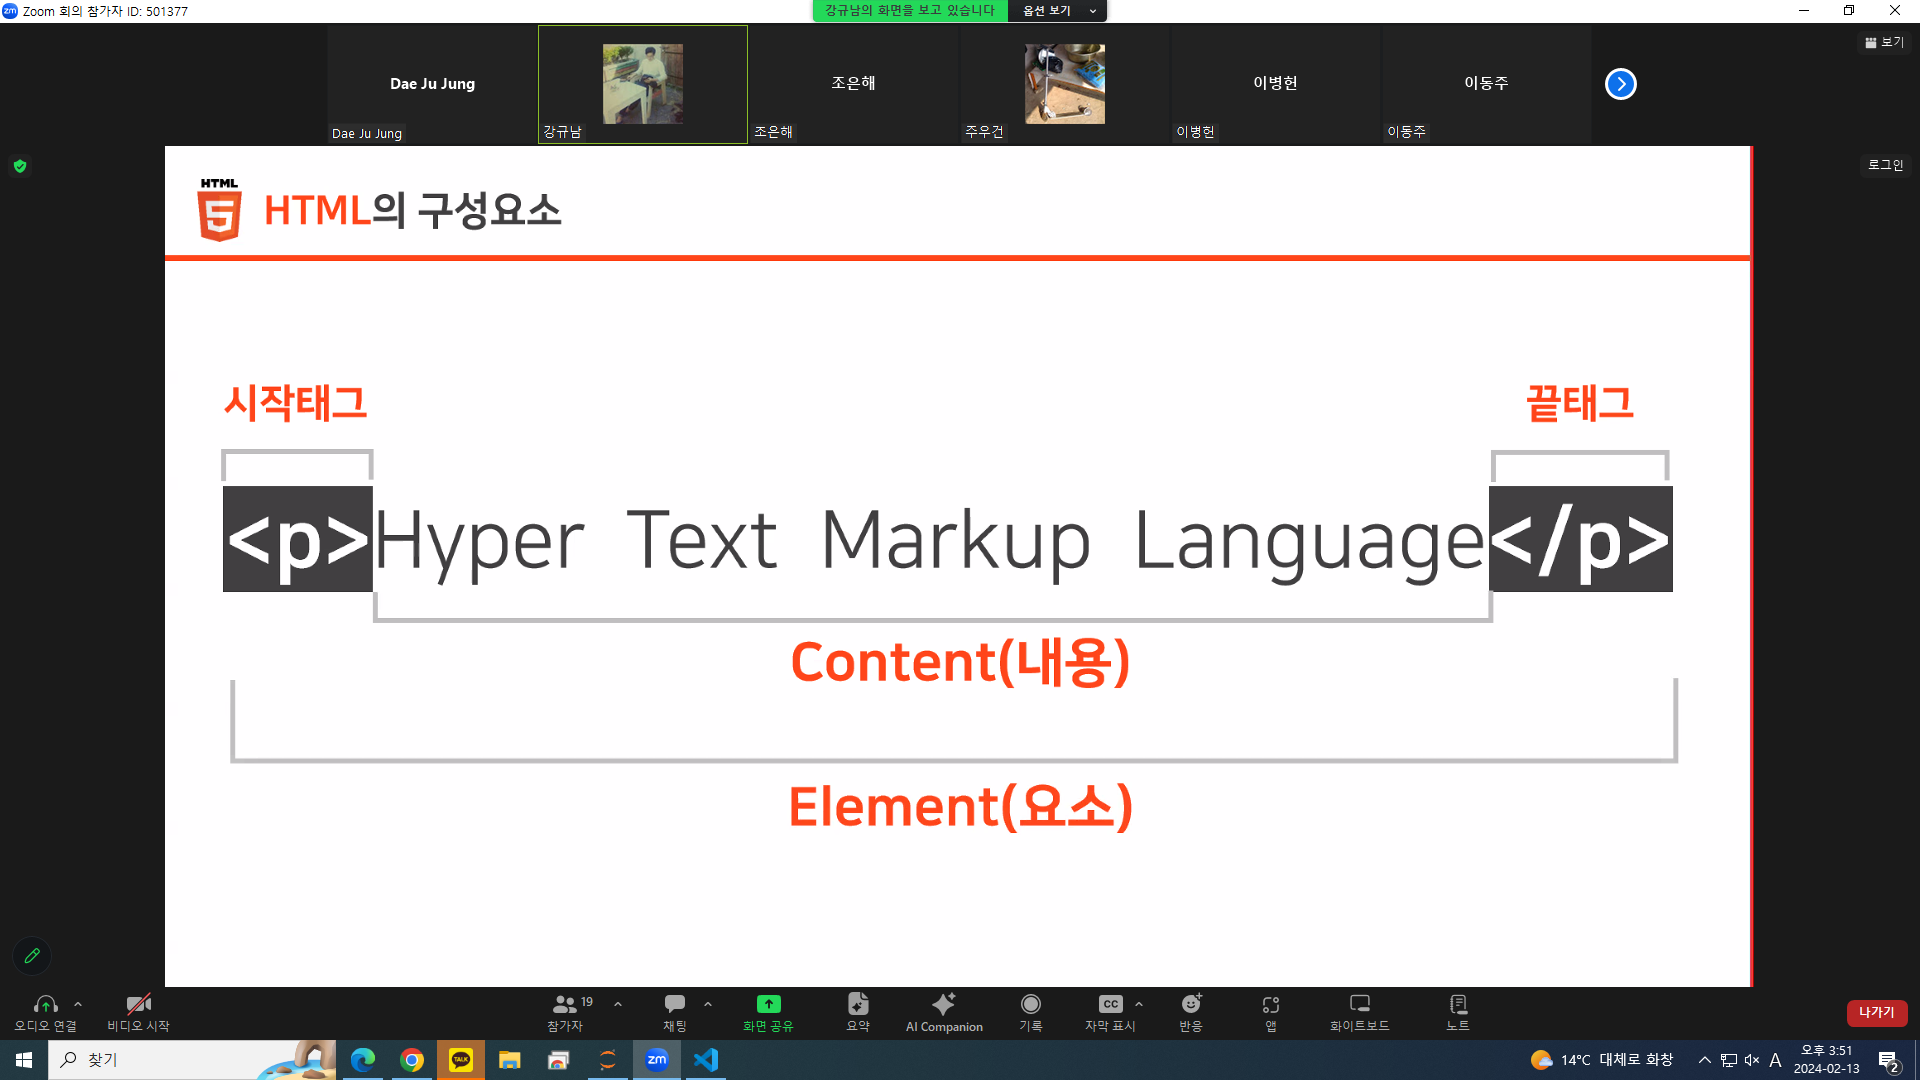

In [6]:
# 검색창에 이강인 값을 보내줘~
# 키보드로 글자을 적는 것과 같다.
search.send_keys('이강인') # 검색창에 이강인 적어진다

In [7]:
# 엔터를 쳐보자 --> 검색창에 보내는 거다 --> 엔터는 대문자로~
# 키보드의 엔터키를 보낸다  --> Keys라이브러리 사용
search.send_keys(Keys.ENTER)

In [8]:
# 화면에 스크롤 최하단 이동하기 --> 키보드 END키 기능(페이지 다운 혹은 스크롤이 아니고 한방에 보내는 것) --> 누구에게 명령을 줄까?
# 화면의 모든 범위 --> 바디 태그에게 준다 --> 바디태그는 페이지당 하나이므로 By.TAG_NAME
# 바디태그에게 키보드의 END값을 보내기
# 실제로 자바 스크립을 활용해서 값을 주는것이 정석이다 아래방식은 정석이 아니다

# 먼저 바디태그를 찾아와야 한다.--> 바디태그에게 키보드 END을 명령한다
# 화면 전체를 담당하는 바디태그에게 키보드의 END값을 보내기
# --> 원래는 자바에서 스크롤막대를 계산해서 그 코드를 사용해서 화면에 스크롤 최하단 이동하기를 실행한다
body = driver.find_element(By.TAG_NAME,'body')
body.send_keys(Keys.END)

In [9]:
# 뒤로가기 --> 드라이버 즉 브라우저에게 준다 --> 뒤로가기는 태그가 별도로 없는 브라우저만의 기능이다
# --> hmtl코드아니고 브라우저에게 바로 준다
# 매개변수 필요 없음  --> 디테일한 정보가 필요없으므로
driver.back() 

In [18]:
# 손흥민 검색을 해보자 --> 손흥민 글자가 검색창에 입력됨
# 전의 코드들이 이미 프이썬에서 진행됬기 때문에 바로 search.send_keys('손흥민')이라고 줄 것이다 -->오류발생
# 이유는 브라우저의 창을 뒤로 가기하면 새로운  페이지로 가는 것이 되므로 새로고침이 된다
# 즉 초기 코드 부터 다시 실행해야 한다 즉 검색창을 찾는 것 부터 다시 시작한다 그전에 코드까지는 다시 실핼 할 필요는 없다

# 페이지가 바뀌면 모든 데이터가 초기화--> 태그 요소들을 반드시 다시 찾아줘야 함
# 클라이언트가 서버에게 새로운 요청을 보내면 서버는 새로운 데이터를 리턴하고 그 전에 데이터는 초기화된다.
search = driver.find_element(By.ID,'query')
# driver.find_element(By.CSS_SELECTOR,'#query')
search.send_keys('손흥민')


In [ ]:
# 통신
# 1자바스크립   비동기 방식 - 특정 탭을 누르면 특정 탭부분만 깜빡이면서 초기화  
# 2 js서브릿      동기 방식 - 로그인시 전체 화면이 깜빡이면서 모든 데이터가 초기화 --> 파이썬 ex05 selenium 자동화 라이브러리
# --> 파이썬 ex05 selenium 자동화 라이브러리 학습에서 페이지 뒤로가기는 전체 화면이 깜빡이는 동기 방식

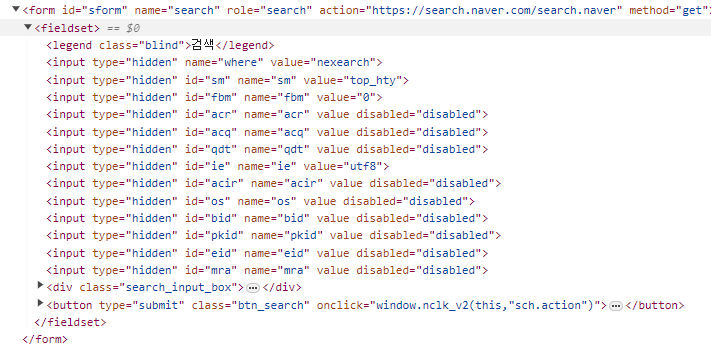

In [19]:
# 전처럼 엔터가 아닌 
# 검색버튼 클릭하기  --> 위의 사진 참조 --> 검색창처럼 검색버튼을 찾는 것이므로 태그를 찾는다 -> 태그이름은 당연히 button이다
# selenium에서 -> find_element함수에서 선택자를 구분지을때 가장 많이 사용되는 것 By.CSS_SELECTOR--> 개발자 도구에서 copy selector을 입력
btn = driver.find_element(By.CSS_SELECTOR,'#sform > fieldset > button')
# 복수개의 태그를 수집하는 것이 아니므로 한개의 태그를 수집하므로 선택자에 삭제할 것은 없다 그냥 복사해서 쓰면 됨
# 클릭함수 --> click()
btn.click()
#  #nx_search_form > fieldset > button  --> 먼가 검색된 상태의 페이지에서 검색버튼태그의 선택자 (copy selector)
#  #sform > fieldset > button --> 네이버 메인에서 검색버튼태그의 선택자 (copy selector)
# 참고 --> 클래스는 태그.클래스명인데 id는 태그#아이디명 이 아니고 그냥 #아이디명

In [13]:
# 창을 종료 해보자 --> 브라우저의 x버튼 누르기 --> hmtl코드아니고 브라우저에게 바로준다
driver.close()

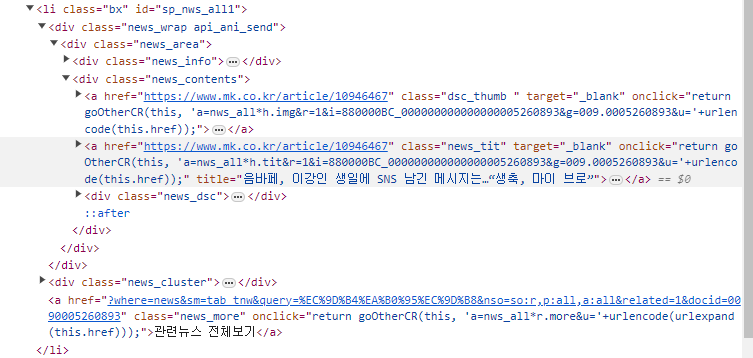

In [20]:
# 위 사진 참조
# 글자만 수집  -> 글자의 태그 정보 --> 역시 By.CSS_SELECTOR --> 개발자 도구에서 copy selector을 입력
# 글자정보는 복수개 이므로 find_elements
# title = driver.find_elements(By.CSS_SELECTOR,'#sp_nws_all4 > div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
# 위의 선택자는 개발자 도구에서 copy selector에서 가져온 것이므로 1개만 수집된다 
# 고로 복수개를 추출하기 위해서는 단수선택자를 제거하자~ --> 여기서는 id선택자인 #sp_nws_all4 만 단수개 이므로 삭제한다
# 잘보면 li태그의 id값이 sp_nws_all4 ,sp_nws_all1등 역시 id이닌깐 단수이다 고로 삭제를 안하면 1개만 리스트에 담긴다.

title = driver.find_elements(By.CSS_SELECTOR,'div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
print(len(title))
title

# soup.select()함수는 선택자 추출이다 ,find_elements()함수도 선택자 추출이다 
# select()함수처럼 find_elements()함수도 리스트를 반환한다

4


[<selenium.webdriver.remote.webelement.WebElement (session="3396cb91cd4f910bb34e4ff43af761fc", element="538A6FEE7202339B89881A3365FF0CC3_element_4907")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3396cb91cd4f910bb34e4ff43af761fc", element="538A6FEE7202339B89881A3365FF0CC3_element_5022")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3396cb91cd4f910bb34e4ff43af761fc", element="538A6FEE7202339B89881A3365FF0CC3_element_5138")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3396cb91cd4f910bb34e4ff43af761fc", element="538A6FEE7202339B89881A3365FF0CC3_element_5253")>]

In [22]:
# 순수한 텍스트만 출력
title_list=[]
for i in title :
    title_list.append(i.text.strip())
title_list

["손흥민, 손가락 보호대 착용한 채…전지현과 미소 '포착'",
 '“인생에서 가장 힘든 한 주” 손흥민, 전지현 만나 웃었다',
 '"손흥민, 탁구 선수들 건드리지 마"…\'탁구게이트\' 풍자에 \'발칵\'',
 '손흥민, 전지현과 런던서 포착…“정말요, 감사합니다” 무슨 말 들었길래']

In [ ]:
# 한페이지안에 수집 --> req
# 여러 페이지 안에 수집 --> selenium --> 페이지를 뒤로가기,닫기 등을 하면서 여러 페이지를 검색하고 수집하는데 유용
# selenium은 파이썬에서 kernel > runall를 누르면 안됨 한칸씩 실행하자.
